In [191]:
import pandas as pd
import numpy as np
import dataframe_image as dfi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Load in the data regarding how many children per woman a OECD country has.
df_fertility = pd.read_excel("Data/1.1_OECD_Fertility_rate.xlsx"  ,sheet_name="Chart SF2.1.A",
    usecols="L,N, O, R",
    skiprows=3 ,nrows=39) 

df_fertility = df_fertility.rename(columns={
    df_fertility.columns[0]: "Country",
    df_fertility.columns[1]: "1970",
    df_fertility.columns[2]: "1995",
    df_fertility.columns[3]: "2021"
})
df_fertility.set_index("Country", inplace=True)

# Load in the data regarding how much of GDP each country in the OECD publicy spend on services for families with children.
df_public_spending = pd.read_excel("Data/1.1_OECD_public_spending_family.xlsx",
                                   usecols="L,M,N, O, P",
                                   skiprows=3, nrows=40)

df_public_spending = df_public_spending.rename(columns={
    df_public_spending.columns[0]: "Country",
    df_public_spending.columns[1]: "Total",
    df_public_spending.columns[2]: "Cash",
    df_public_spending.columns[3]: "Public_services",
    df_public_spending.columns[4]: "Taxbreaks"
})
df_public_spending.set_index("Country", inplace=True)

# Load in the data regarding how likely women are to be employed partly or fully.
df_GenderDiff_employment = pd.read_excel("Data/1_1_OECD_Gender_differences_in_employment_outcomes.xlsx",
                                         usecols="L,P,Q,R",
                                         skiprows=3, nrows=42)

df_GenderDiff_employment = df_GenderDiff_employment.rename(columns={
    df_GenderDiff_employment.columns[0]: "Country",
    df_GenderDiff_employment.columns[1]: "Male",
    df_GenderDiff_employment.columns[2]: "Female",
    df_GenderDiff_employment.columns[3]: "Total"
})
df_GenderDiff_employment.set_index("Country", inplace=True)



# Load in the data regarding how likely Mothers are to be employeed.
df_maternal_employment = pd.read_excel("Data/1_1_OECD_Maternal_employment_by_partnership_status.xlsx",
                                       usecols="L,M, N, O",
                                       skiprows=5, nrows=42)

df_maternal_employment = df_maternal_employment.rename(columns={
    df_maternal_employment.columns[0]: "Country",
    df_maternal_employment.columns[1]: "Total",
    df_maternal_employment.columns[2]: "Partnered",
    df_maternal_employment.columns[3]: "Single"
})
df_maternal_employment.set_index("Country", inplace=True)


# df_fertility.head(39)

# The population decline

The world is changing rapidly and our way of life has changed drastically in the last 100 years, but ironically as technology makes our lives easier and more comfortable in many aspects, people become less inclined to procreate, not more.

But the population decline isn't spread out equally among the OECD nations it is significantly worse in certain countries.

But the data isn't straightforward, it is complex and can easily be deceptive if not taken in lieu of a myriad of societal factors at play. Certain countries exist in very unique circumstances, while others are yet to reach the population decline we see in the modern society.

So lets begin by taking a look back we will start in the 1970:

C:\Users\Delic\AppData\Local\Temp\ipykernel_11252\591153934.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



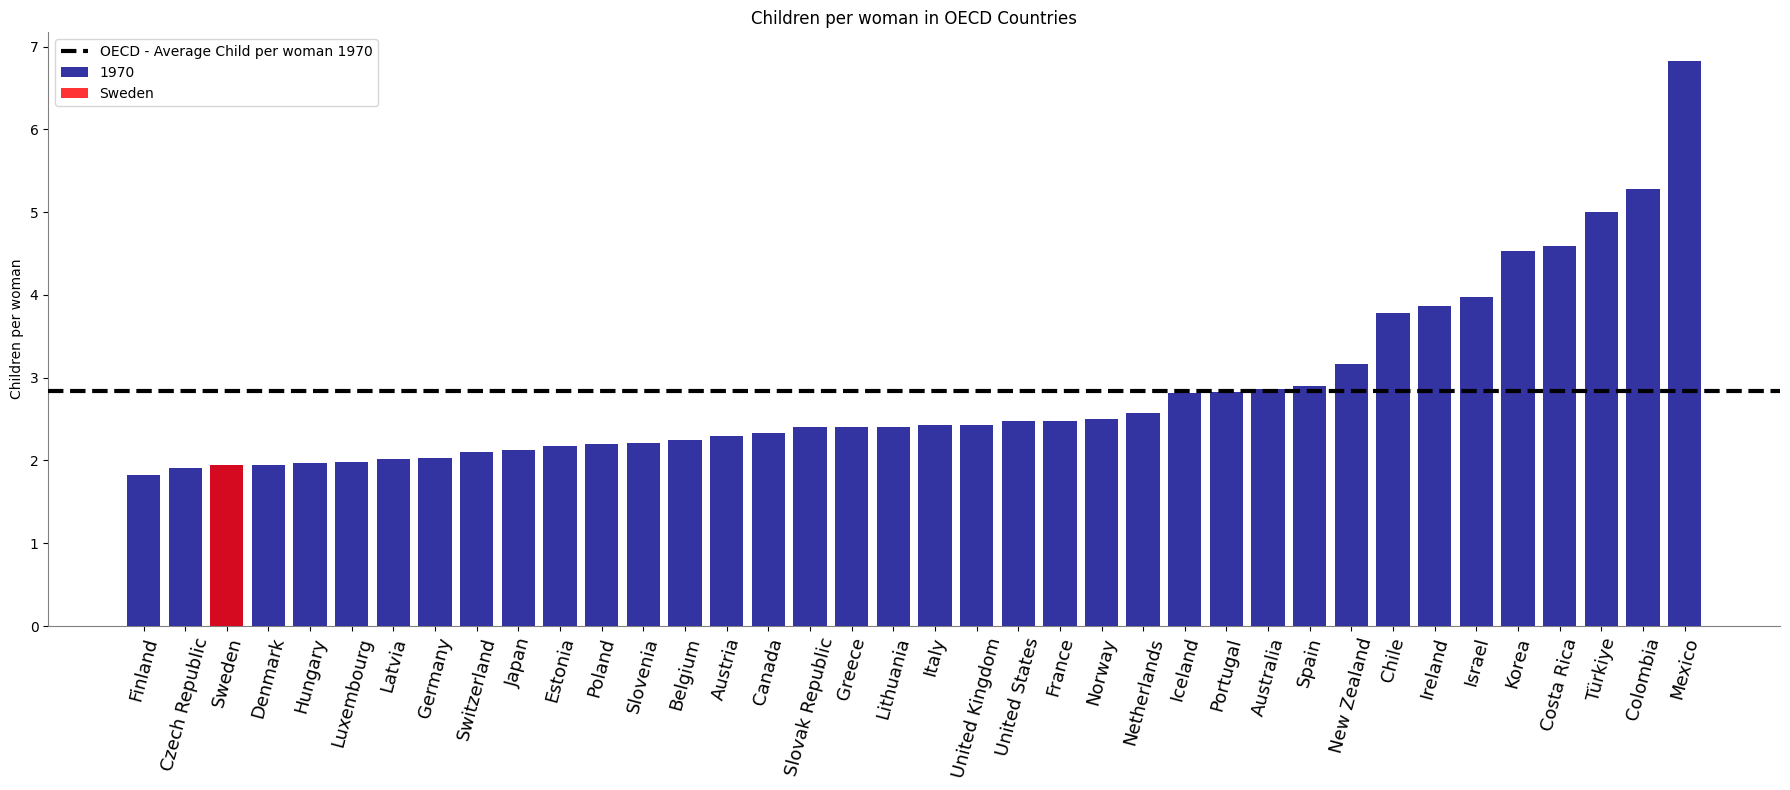

In [192]:
fig, ax = plt.subplots(figsize=(18, 8))


df_fertility_sorted = df_fertility[df_fertility.index !=
                                   "OECD average"].sort_values("1970", ascending=True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("grey")
ax.spines["bottom"].set_color("grey")


ax.bar(df_fertility_sorted.index.astype(str),
       df_fertility_sorted["1970"], color="darkblue", label="1970", alpha=0.8,  zorder=3)
ax.axhline(y=2.84, color="black", linewidth=3, linestyle="--",
           label="OECD - Average Child per woman 1970", zorder=5)
ax.bar("Sweden", df_fertility_sorted.loc["Sweden", "1970"],
       color="red", label="Sweden", alpha=0.8, zorder=4)


ax.set_ylabel("Children per woman")
ax.set_title("Children per woman in OECD Countries")
ax.set_xticklabels(df_fertility_sorted.index.astype(
    str), rotation=75, fontsize=13)

ax.legend()

plt.tight_layout()
plt.savefig("Visualiseringar/Labb2_Project_1.png",
            dpi=300, bbox_inches="tight")
plt.show()

# Sweden after 1945

Sweden after WW2 was a country relatively unscathed by war, this mean that Swedish GDP per capita and living standard were high and exports were very strong, the ruling parties focused on wellfare and equality was adopted and many of those policies would go on to be standardized for other countries out in the EU. Of course, Sweden isn't unique with doing this but they are in focus here.

C:\Users\Delic\AppData\Local\Temp\ipykernel_11252\2667865551.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



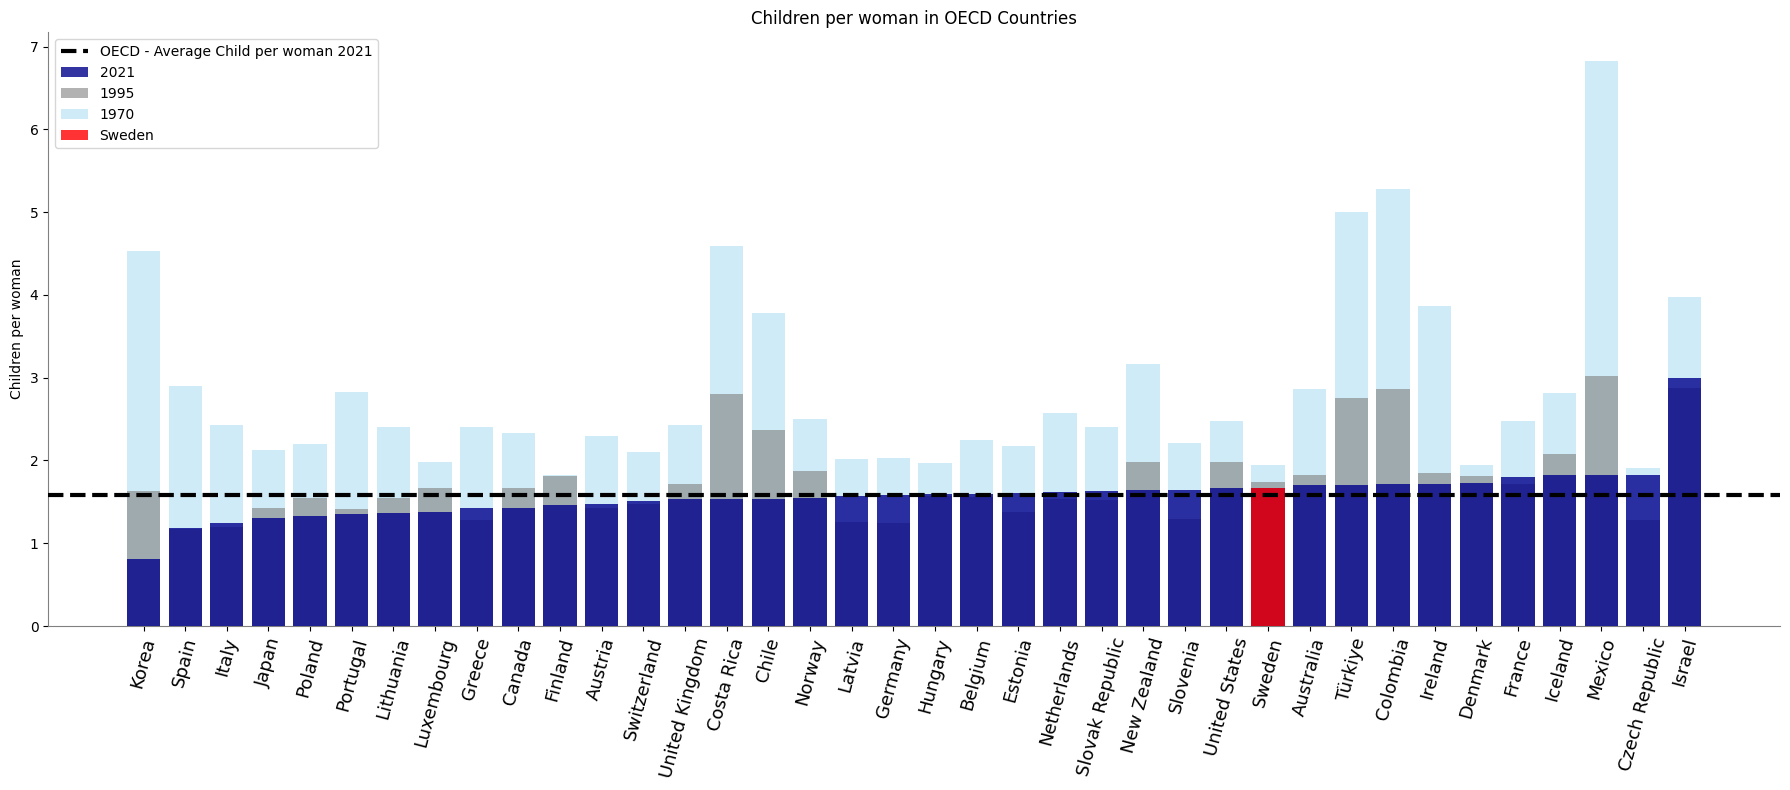

In [193]:
fig, ax = plt.subplots(figsize=(18, 8))


df_fertility_sorted = df_fertility[df_fertility.index !="OECD average"].sort_values("2021", ascending=True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("grey")
ax.spines["bottom"].set_color("grey")


ax.bar(df_fertility_sorted.index.astype(str),
       df_fertility_sorted["2021"], color="darkblue", label="2021", alpha=0.8,  zorder=3)

ax.bar(df_fertility_sorted.index.astype(str),
       df_fertility_sorted["1995"], color="grey", label="1995", alpha=0.6, zorder=2)
ax.bar(df_fertility_sorted.index.astype(str),
       df_fertility_sorted["1970"], color="skyblue", label="1970", alpha=0.4, zorder=1)
ax.bar("Sweden", df_fertility_sorted.loc["Sweden", "2021"],
       color="red", label="Sweden", alpha=0.8, zorder=4)



ax.axhline(y=1.58, color="black", linewidth=3, linestyle="--",
           label="OECD - Average Child per woman 2021", zorder=5)

ax.set_ylabel("Children per woman")
ax.set_title("Children per woman in OECD Countries")
ax.set_xticklabels(df_fertility_sorted.index.astype(
    str), rotation=75, fontsize=13)

ax.legend()

plt.tight_layout()  
plt.savefig("Visualiseringar/Labb2_Project_2.png",
            dpi=300, bbox_inches="tight")
plt.show()

## The population pyramid collapse

In 1970 Sweden had the third lowest replacement rate and well under the OECD-average, but 50 years later and Sweden is located above the OECD average. This in context is a great success story, but it didn't come overnight, nor is it enough to reach the longterm goal of 2.1 replacement rate in order to avoid an inverted population pyramid

But what we see here that is very distinct is a trend of certain countries falling significantly, with countries such as Korea, Italy and Mexico having a very steppe decline. 


Israel is in a very unique situation and due to its hard to draw any conclusions from its data *

C:\Users\Delic\AppData\Local\Temp\ipykernel_11252\2126540501.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



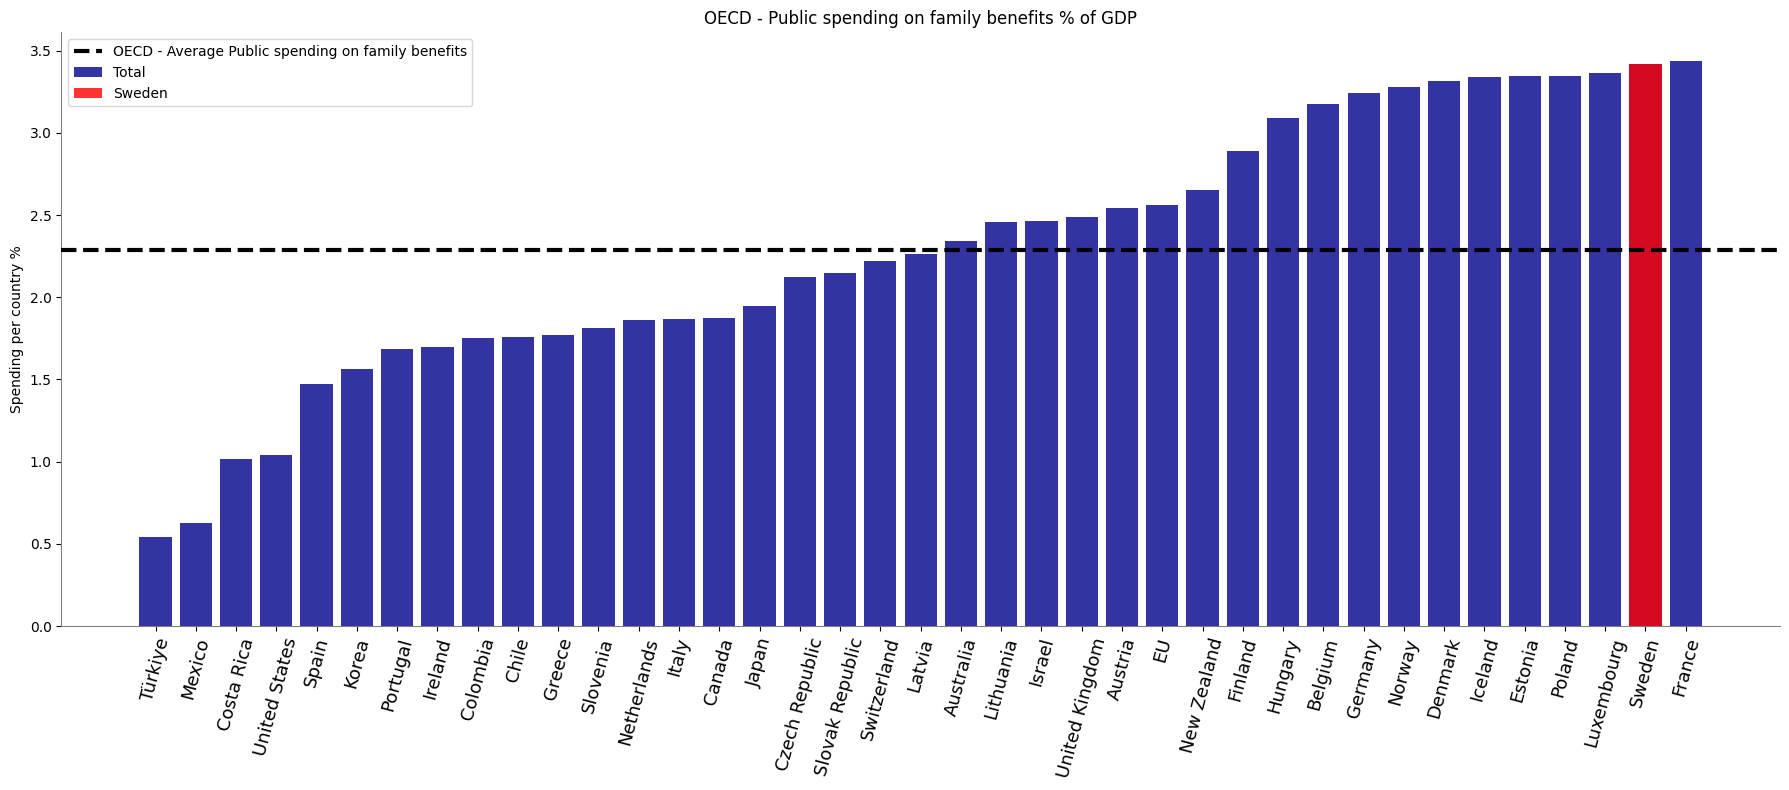

In [194]:
fig, ax = plt.subplots(figsize=(18, 8))


df_public_spending_sorted = df_public_spending[df_public_spending.index !=
                                   "OECD"].sort_values("Total", ascending=True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("grey")
ax.spines["bottom"].set_color("grey")


ax.bar(df_public_spending_sorted.index.astype(str),
       df_public_spending_sorted["Total"], color="darkblue", label="Total", alpha=0.8,  zorder=3),

ax.bar("Sweden", df_public_spending_sorted.loc["Sweden", "Total"],
       color="red", label="Sweden", alpha=0.8, zorder=4)


ax.axhline(y=2.29, color="black", linewidth=3, linestyle="--",
           label="OECD - Average Public spending on family benefits", zorder=5)

ax.set_ylabel("Spending per country %")
ax.set_title("OECD - Public spending on family benefits % of GDP")
ax.set_xticklabels(df_public_spending_sorted.index.astype(
    str), rotation=75, fontsize=13)

ax.legend()

plt.tight_layout()
plt.savefig("Visualiseringar/Labb2_Project_3.png",
            dpi=300, bbox_inches="tight")
plt.show()

## Public spending on family benefits.

There is a pattern among countries that manage to slow down the fertility rate and even push up their fertility. One of the those conditions has to do with their spending on family benefits. it icentivizes and alleviates some of the pressure felt by families in modern societies. Here we can also see that the more public spending onto family benefits, the lesss severe the drop from 1970 seems to be.

However, it is worth noting that Turkiye, Mexico, Costa Rica and Chile are some of the countries with the lowest spending, yet they are are still above the OECD average. This contradicts that hypothesis, but we will touch on that a little later.

In [195]:

df_public_spending_sorted = df_public_spending[df_public_spending.index != "OECD average"].sort_values(
    "Total", ascending=True)

top_10_spenders = df_public_spending_sorted.tail(10)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_10_spenders.index,
    y=top_10_spenders["Public_services"],
    name='Services',,
    marker_color='Darkblue'
))

fig.add_trace(go.Bar(
    x=top_10_spenders.index,
    y=top_10_spenders["Cash"],
    name='Cash',
    marker_color='blue',
    base=top_10_spenders["Public_services"]
))

fig.add_trace(go.Bar(
    x=top_10_spenders.index,
    y=top_10_spenders["Taxbreaks"],
    name='Taxbreaks',
    marker_color='Purple',
    base=top_10_spenders["Public_services"] + top_10_spenders["Cash"]
))


fig.update_layout(
    title="Top 10 OECD Countries - Public spending on family in % of GDP",
    xaxis_title="Country",
    yaxis_title="Spending per country",
    xaxis=dict(tickangle=75, tickfont=dict(size=13)),
    barmode='relative',
)

# Displaying the plot
fig.write_image("Visualiseringar/Labb2_project_4.png", scale=3)
fig.show()

SyntaxError: invalid syntax (779616776.py, line 11)

In [56]:

df_public_spending_sorted = df_public_spending[df_public_spending.index != "OECD average"].sort_values(
    "Total", ascending=True)

Bottom_10_spenders = df_public_spending_sorted.head(10)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=Bottom_10_spenders.index,
    y=Bottom_10_spenders["Public_services"],
    name="Services",
    marker_color="Darkblue"
))

fig.add_trace(go.Bar(
    x=Bottom_10_spenders.index,
    y=Bottom_10_spenders["Cash"],
    name="Cash",
    marker_color="blue",
    base=Bottom_10_spenders["Public_services"]
))

fig.add_trace(go.Bar(
    x=Bottom_10_spenders.index,
    y=Bottom_10_spenders["Taxbreaks"],
    name="Taxbreaks",
    marker_color="Purple",
    base=Bottom_10_spenders["Public_services"] + Bottom_10_spenders["Cash"]
))


fig.update_layout(
    title="Bottom 10 OECD Countries - Public spending on family in % of GDP",
    xaxis_title="Country",
    yaxis_title="Spending per country",
    xaxis=dict(tickangle=75, tickfont=dict(size=13)),
    barmode="relative",
)

# Displaying the plot
fig.write_image("Visualiseringar/Labb2_project_5.png", scale=3)
fig.show()

## We see the Bottom 10 OECD countries and how spend significantly less on Public policies for families, this combined with the lack of women in the workforce is one of the main reason they still hold an above average OECD reating.

In [198]:
df_maternal_employment['Total'] = pd.to_numeric(
    df_maternal_employment['Total'], errors='coerce')


df_maternal_employment_sorted = df_maternal_employment[df_maternal_employment.index != 'OECD average'].sort_values(
    'Total', ascending=True)


top_10 = df_maternal_employment_sorted.tail(10)
bottom_10 = df_maternal_employment_sorted.head(10)

fig = go.Figure()


fig.add_trace(go.Bar(
    x=top_10.index,
    y=top_10["Total"],
    name="Top 10 - Employment rate for mothers",
    marker_color="Darkblue",
    text=top_10["Total"].round(1),
    textposition="outside",
))


fig.add_trace(go.Bar(
    x=bottom_10.index,
    y=bottom_10["Total"],
    name="Bottom 10 - Employment rate for mothers",
    marker_color="Darkred",
    text=bottom_10["Total"].round(1),
    textposition="inside",
))


fig.update_layout(
    title="Top and Bottom 10 OECD Countries - Employment Rates for Mothers (25-54) with at least one child aged 0-14",
    xaxis_title="Country",
    yaxis_title="Employment rate (%)",
    xaxis=dict(tickangle=75, tickfont=dict(size=13)),
    barmode="group",
    width=1280,
    height=720,
)

fig.write_image("Visualiseringar/Labb2_project_6.png", scale=3)
fig.show()

## Summary

There is so much more to learn about how the modern society will have to adapt to ensure people reach the replacement level fertility, but as i hope this explanatory analysis has shown, prioritizing public spending on family benefits, ensuring mothers have job security and doesn't have to rely on their traditional networks creates the kind of society that is showing itself able to turn the tide, but not stem it.